## Getting Started

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('D:\\Kaggle\\CARS DATASET (Audi, BMW, Ford, Hyundai, Skoda, VW)\\cars_dataset.csv')

In [3]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Make
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi


## Exploratory Data Analysis

In [5]:
data.shape

(72435, 10)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72435 entries, 0 to 72434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         72435 non-null  object 
 1   year          72435 non-null  int64  
 2   price         72435 non-null  int64  
 3   transmission  72435 non-null  object 
 4   mileage       72435 non-null  int64  
 5   fuelType      72435 non-null  object 
 6   tax           72435 non-null  float64
 7   mpg           72435 non-null  float64
 8   engineSize    72435 non-null  float64
 9   Make          72435 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [7]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Make            0
dtype: int64

In [8]:
data.duplicated().sum()

842

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,72435.0,2017.073666,2.101252,1996.0,2016.0,2017.0,2019.0,2020.0
price,72435.0,16580.158708,9299.028754,495.0,10175.0,14495.0,20361.0,145000.0
mileage,72435.0,23176.517057,21331.515562,1.0,7202.5,17531.0,32449.0,323000.0
tax,72435.0,116.953407,64.045533,0.0,30.0,145.0,145.0,580.0
mpg,72435.0,55.852480,17.114391,0.3,47.9,55.4,62.8,470.8
engineSize,72435.0,1.635650,0.561535,0.0,1.2,1.6,2.0,6.6


In [14]:
data.describe(include='object').T

,count,unique,top,freq
model,72435,146,Fiesta,6556
transmission,72435,4,Manual,43021
fuelType,72435,5,Petrol,40370
Make,72435,7,Ford,17964


In [7]:
data.nunique()

model             146
year               25
price           10418
transmission        4
mileage         35743
fuelType            5
tax                47
mpg               177
engineSize         32
Make                7
dtype: int64

In [8]:
data.Make.unique()

array(['audi', 'BMW', 'Ford', 'vw', 'toyota', 'skoda', 'Hyundai'],
      dtype=object)

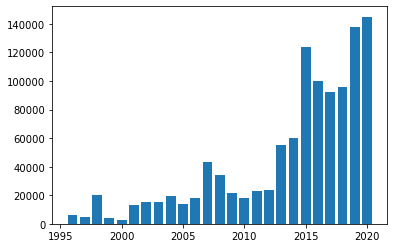

In [20]:
plt.bar(data.year, data.price)
plt.show()

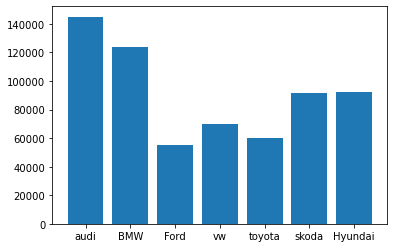

In [22]:
plt.bar(data.Make, data.price)
plt.show()

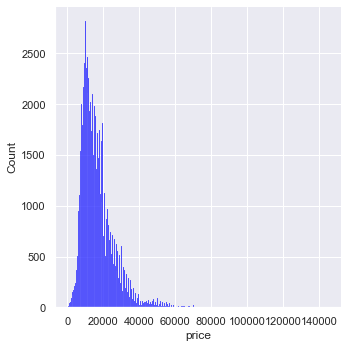

In [21]:
sns.displot(data.price, color='blue');

The distribution is right-skewed, let's remove outliers using boxplot

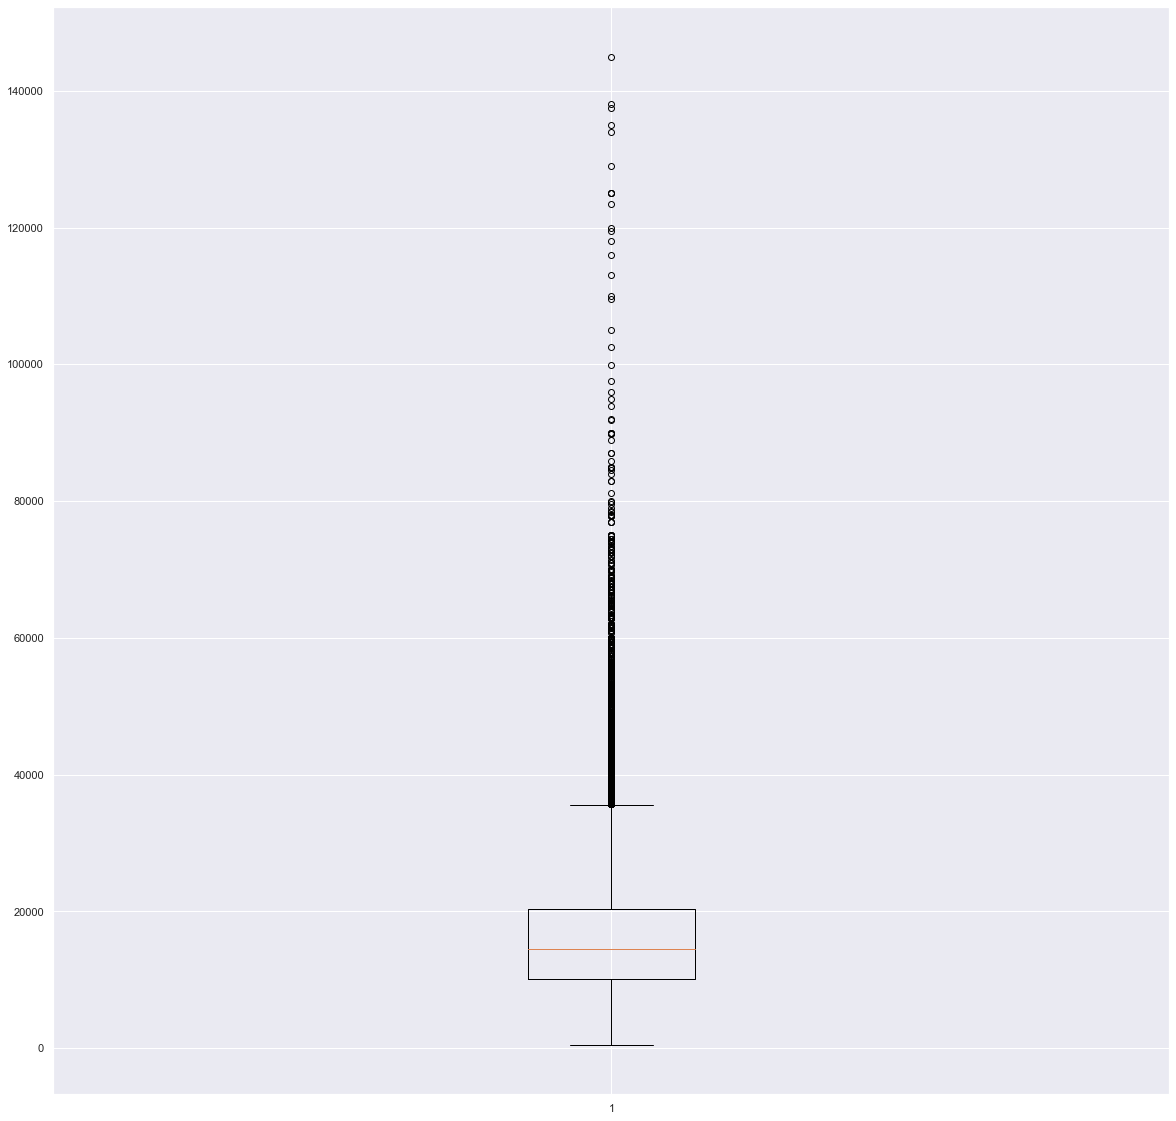

In [27]:
plt.boxplot(data.price);

In [25]:
# Find IQR
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

10186.0


In [30]:
# Remove outliers with a criteria: 1.5 * IQR
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]

In [31]:
data.shape

(69735, 10)

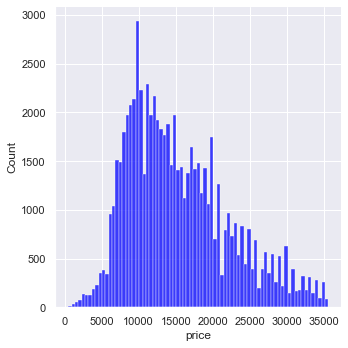

In [35]:
sns.displot(data['price'], color="blue");

Insights:
- No null values are present in the dataset
- Duplicate values are present in the dataset
- 

## Data pre-processing